## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
pharma_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
pharma_data.columns = ["MouseID","Drug","Sex","AgeMonths","WeightGrams","TimePoint","TumorVolume","MetastaticSites"]

pharma_groupby = pharma_data.groupby("Drug")
pharma_mean = pharma_groupby["TumorVolume"].mean()
pharma_mean = pd.DataFrame(pharma_mean)
pharma_median = pharma_groupby["TumorVolume"].median()
pharma_median = pd.DataFrame(pharma_median)
pharma_variance = pharma_groupby["TumorVolume"].var()
pharma_variance = pd.DataFrame(pharma_variance)
pharma_std = pharma_groupby["TumorVolume"].std()
pharma_std = pd.DataFrame(pharma_std)
pharma_sem = pharma_groupby["TumorVolume"].sem()
pharma_sem = pd.DataFrame(pharma_sem)
pharma_summary = pd.concat([pharma_mean,pharma_median,pharma_variance,pharma_std,pharma_sem], axis=1, ignore_index=False)
pharma_summary.columns = ["MeanTumorVolume","MedianTumorVolume","VarianceTumorVolume","StDevTumorVolume","SemTumorVolume"]
pharma_summary



,MeanTumorVolume,MedianTumorVolume,VarianceTumorVolume,StDevTumorVolume,SemTumorVolume
Drug,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0, 0.5, 'Count of Data Points')

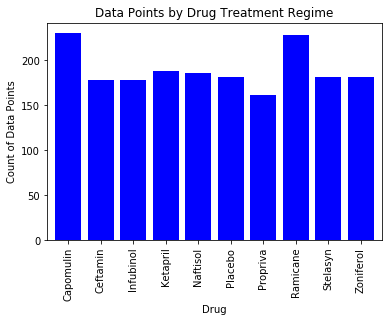

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
pharma_count = pharma_groupby["MouseID"].count()
pharma_count = pd.DataFrame(pharma_count)
data_chart = pharma_count.plot(kind="bar", legend=False, width=.8, color=["blue"])
data_chart.set_title("Data Points by Drug Treatment Regime")
data_chart.set_ylabel("Count of Data Points")

Text(0, 0.5, 'Count of Data Points')

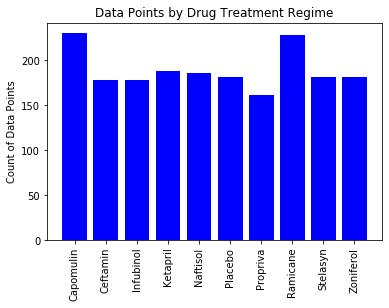

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
data_points = pharma_count["MouseID"]
x_axis = np.arange(len(pharma_count[["MouseID"]]))
plt.bar(x_axis, data_points,color="b",align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,pharma_count.index)
plt.xticks(rotation=90)
plt.title("Data Points by Drug Treatment Regime")
plt.ylabel("Count of Data Points")



## Pie plots

In [5]:
# Groupby Sex to get count of male and female mice
mouse_sex = pharma_data[['MouseID','Sex']]
mouse_sex.drop_duplicates(inplace=True)
sex_groupby = mouse_sex.groupby("Sex")
sex_count = sex_groupby.count()
sex_count.reset_index()

C:\Users\mkoza\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Sex,MouseID
0,Female,124
1,Male,125


[Text(0, 0.5, '')]

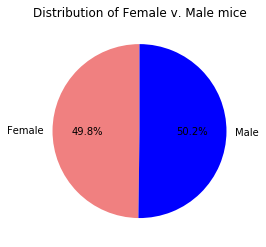

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
ax =sex_count.plot(kind="pie",x="Sex",y="MouseID",title="Distribution of Female v. Male mice", legend=False, colors=["lightcoral","blue"],startangle=90, autopct="%1.1f%%")
ax.set(ylabel="")


Text(0.5, 1.0, 'Distribution of Female v. Male mice')

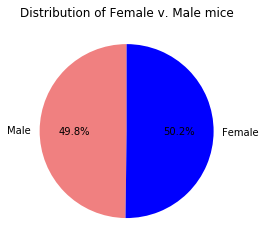

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]
sizes = [124,125]
colors = ["lightcoral","blue"]
plt.pie(sizes,labels=labels,colors=colors,autopct="%1.1f%%",startangle=90)
plt.title("Distribution of Female v. Male mice")



## Quartiles, outliers and boxplots

In [8]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimes
#sort by time point and mouse
pharma_data1 = pharma_data.sort_values(by=["MouseID","TimePoint"])
pharma_data1 = pharma_data1.drop_duplicates("MouseID",keep= "last")
pharma_data1.head()



,MouseID,Drug,Sex,AgeMonths,WeightGrams,TimePoint,TumorVolume,MetastaticSites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
483,a262,Placebo,Female,17,29,45,70.717621,4
493,a275,Ceftamin,Female,20,28,45,62.999356,3
500,a366,Stelasyn,Female,16,29,30,63.440686,1


In [9]:
#Calculate the IQR
#create list of drugs to loop through
drug_list = ["Capomulin","Ramicane","Infubinol", "Ceftamin"]

#create empty list to start results of for loop
summary_quartiles = []

#create loop to get quartile information
for drug in drug_list:  
    temp_volume = pharma_data1.loc[(pharma_data["Drug"]==drug)]
    quartiles = temp_volume["TumorVolume"].quantile([.25,.5,.75])
    summary_quartiles.append(quartiles) 

summary_quartiles = pd.concat(summary_quartiles, axis = 1)
summary_quartiles.columns = drug_list

#set up counter for second for loop
df_counter = np.arange(len(drug_list))

#set up empty list to hold boxplot relevant info
list_boxplot = []

#for loop to get summary information
for i in df_counter:
    lowerq = summary_quartiles.iloc[0,i]
    upperq = summary_quartiles.iloc[2,i]
    iqr = upperq-lowerq
    outlier_upper = upperq + (1.5*iqr)
    outlier_lower = lowerq - (1.5*iqr)
    summary_boxplot = [outlier_lower, lowerq,iqr,upperq,outlier_upper]
    list_boxplot.append(summary_boxplot)

df_boxplot = pd.DataFrame(list_boxplot)
df_boxplot.index = drug_list
df_boxplot.columns = ["outlier_lower", "lowerq","iqr","upperq","outlier_upper"]

df_boxplot

,outlier_lower,lowerq,iqr,upperq,outlier_upper
Capomulin,20.704562,32.377357,7.781863,40.159220,51.832015
Ramicane,17.912664,31.560470,9.098537,40.659006,54.306811
Infubinol,36.832905,54.048608,11.477135,65.525743,82.741446
Ceftamin,25.355450,48.722078,15.577752,64.299830,87.666458


In [10]:
#Quantitatively determine if there are any outliers

#create empty list for drug subset
drug_subset = []

for i in df_counter:
    temp_subset = pharma_data1.loc[(pharma_data["Drug"]==drug_list[i])]
    drug_subset.append(temp_subset)

for i in df_counter:
    if df_boxplot.iloc[i,0] > drug_subset[i]["TumorVolume"].min() or df_boxplot.iloc[i,4] < drug_subset[i]["TumorVolume"].max():
        print(f"{drug_list[i]} potentially has outlier tumor volumes")
    else:
        print(f"{drug_list[i]} doesn't seem to have any outlier tumor volumes")
        

Capomulin doesn't seem to have any outlier tumor volumes
Ramicane doesn't seem to have any outlier tumor volumes
Infubinol potentially has outlier tumor volumes
Ceftamin doesn't seem to have any outlier tumor volumes


Text(0.5, 1.0, 'Final Tumor Volume by Treatment')

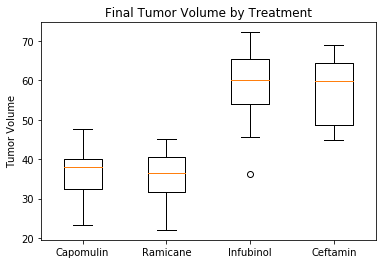

In [11]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
capomulin = drug_subset[0]["TumorVolume"]
ramicane = drug_subset[1]["TumorVolume"]
infubinol = drug_subset[2]["TumorVolume"]
ceftamin = drug_subset[3]["TumorVolume"]

boxplot_figure = plt.boxplot([capomulin, ramicane,infubinol,ceftamin], labels = drug_list)
plt.ylabel("Tumor Volume")
plt.title("Final Tumor Volume by Treatment")

## Line and scatter plots

Text(0, 0.5, 'Tumor Volume')

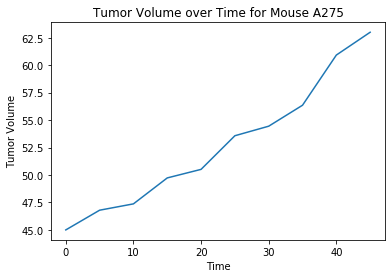

In [32]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_a275 = pharma_data.loc[(pharma_data["MouseID"]=="a275")]
x_axis = mouse_a275["TimePoint"]
y_axis = mouse_a275["TumorVolume"]
plt.plot(x_axis,y_axis)
plt.title("Tumor Volume over Time for Mouse A275")
plt.xlabel("Time")
plt.ylabel("Tumor Volume")

Text(0, 0.5, 'Tumor Volume')

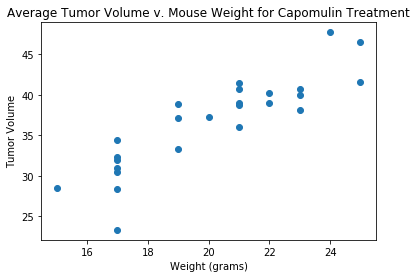

In [24]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
pharma_data1.head()

capomulin_WeightTumor = pharma_data1.loc[(pharma_data1["Drug"]=="Capomulin")]
capomulin_WeightTumor
capomulin_weight = capomulin_WeightTumor[["WeightGrams"]]
capomulin_volume = capomulin_WeightTumor[["TumorVolume"]]
plt.scatter(capomulin_weight, capomulin_volume)
plt.title("Average Tumor Volume v. Mouse Weight for Capomulin Treatment")
plt.xlabel("Weight (grams)")
plt.ylabel("Tumor Volume")

The correlation coefficient for this linear model is 0.877


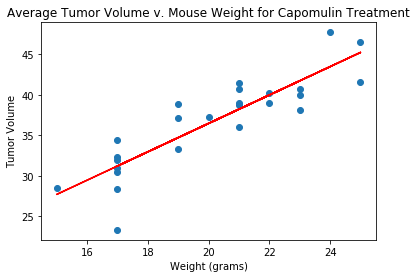

In [28]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

x = capomulin_WeightTumor["WeightGrams"]
y = capomulin_WeightTumor["TumorVolume"]
slope,intercept,rvalue,pvalue,stderr = st.linregress(x,y)

capomulin_WeightTumor = pharma_data1.loc[(pharma_data1["Drug"]=="Capomulin")]
capomulin_WeightTumor
capomulin_weight = capomulin_WeightTumor[["WeightGrams"]]
capomulin_volume = capomulin_WeightTumor[["TumorVolume"]]
plt.scatter(capomulin_weight, capomulin_volume)
regress_values = x * slope + intercept
plt.plot(x,regress_values,"r-")
plt.title("Average Tumor Volume v. Mouse Weight for Capomulin Treatment")
plt.xlabel("Weight (grams)")
plt.ylabel("Tumor Volume")
print(f"The correlation coefficient for this linear model is {round(rvalue,3)}")




